In [1]:
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt
from utils.dataloader import *
from sklearn.kernel_approximation import RBFSampler
DATA_DIR = "./data"

In [2]:
dataGenerator = MLRepositoryDatasetGenerator('balance', DATA_DIR)

train_x, train_y, test_x, test_y = dataGenerator.get_data_as_arrays()

n = test_x.shape[0]

The explanatory data contains 4 features
There are 3 target classes


In [3]:
test_y = test_y.reshape(test_y.shape[0], 1)

In [125]:
Kx = sklearn.metrics.pairwise.rbf_kernel(test_x, gamma=0.1)
Ky = test_y.dot(test_y.T)

In [65]:
s = np.sqrt(1/2 * 0.1)

In [55]:
H = np.identity(n) - 1 / n * np.ones((n,n)) 

In [56]:
F = RBFSampler(gamma=0.1, n_components=2000, random_state=42)

In [57]:
features = F.fit_transform(test_x)

In [128]:
Xi = np.random.normal(loc=0, scale=s, size=(2000,4))
b = np.random.uniform(0, 2 * np.pi, size=(2000,1))

In [115]:
s

0.22360679774997896

In [116]:
B.shape

(1000, 125)

In [141]:
B    = np.repeat(b[:, np.newaxis], 125, axis=1)
approx_features = 1 / np.sqrt(2000) * np.cos(Xi.dot(test_x.T) + b)

In [142]:
approx_features.shape

(2000, 125)

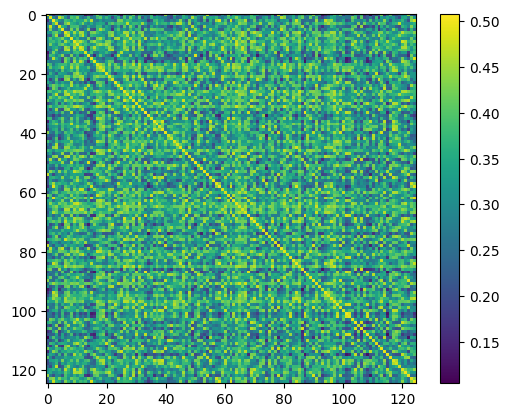

In [143]:
plt.imshow(approx_features.T.dot(approx_features), cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()

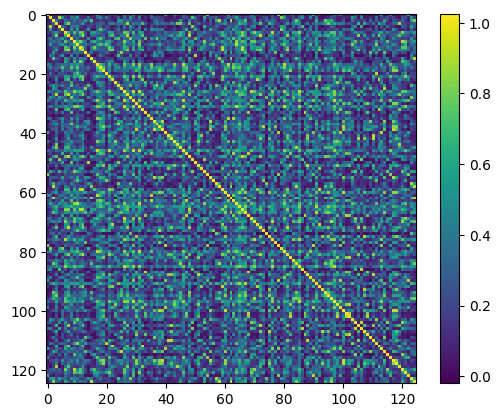

In [63]:
plt.imshow(features.dot(features.T), cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()

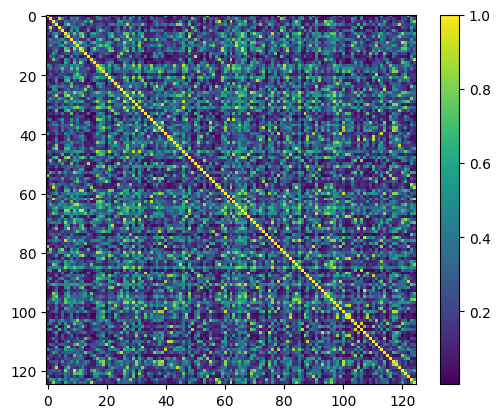

In [126]:
plt.imshow(Kx, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()

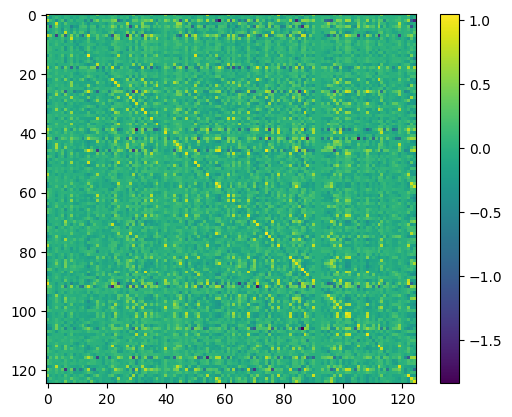

In [71]:
plt.imshow(HKx.T*HKy, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()

In [68]:
HKx = Kx - np.mean(Kx, axis=0) # equivalent to		HKᵪ = H.dot(Kᵪ)
HKy = Ky - np.mean(Ky, axis=0) # equivalent to		HKᵧ = H.dot(Kᵧ)

Hxy = np.sum(HKx.T*HKy)

Hx = np.linalg.norm(HKx)
Hy = np.linalg.norm(HKy)

hsic = Hxy / (Hx * Hy)

In [70]:
HKx

array([[ 0.83509423, -0.10618826, -0.24883466, ...,  0.43416426,
        -0.22495957, -0.22924333],
       [-0.04244934,  0.77135531, -0.11426161, ..., -0.15407078,
         0.25664656, -0.07993308],
       [-0.14991019, -0.07907607,  0.73616977, ..., -0.20278251,
         0.31436558,  0.55611415],
       ...,
       [ 0.50541427, -0.14655969, -0.23045696, ...,  0.76384422,
        -0.22495957, -0.18834302],
       [-0.09770026,  0.32016695,  0.34270043, ..., -0.16895027,
         0.70783492,  0.34391406],
       [-0.1315325 , -0.04596117,  0.55490052, ..., -0.1618822 ,
         0.31436558,  0.7373834 ]])

In [111]:
t.shape

(1000,)

ValueError: Found array with dim 3. check_pairwise_arrays expected <= 2.

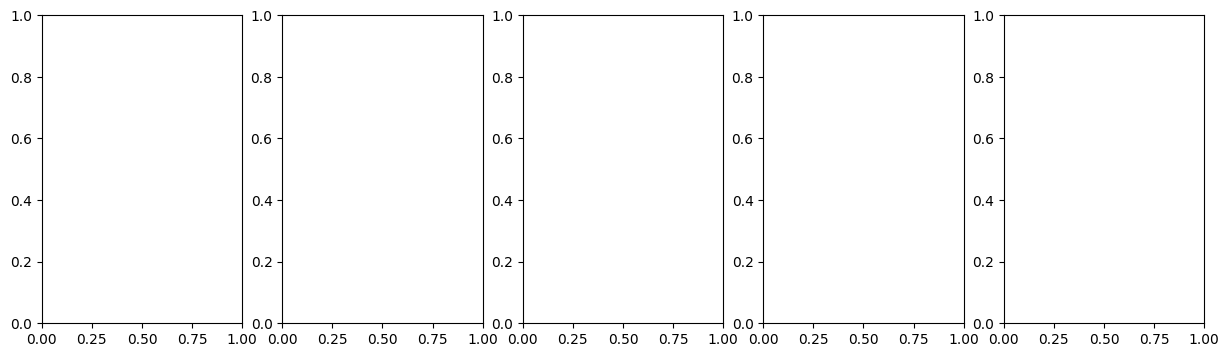

In [112]:
import matplotlib.pyplot as plt
import numpy as np
from   sklearn.metrics.pairwise import rbf_kernel
from   sklearn.datasets import make_s_curve


# -----------------------------------------------------------------------------

fig, axes = plt.subplots(1, 5)
fig.set_size_inches(15, 4)
font = {'fontname': 'arial', 'fontsize': 18}

N    = 1000
D    = 3
X = test_y
X    = X[X.argsort()]
# The RBF kernel is the Gaussian kernel if we let \gamma = 1 / (2 \sigma^2).
K    = rbf_kernel(X, gamma=1/2.)

axes[0].imshow(K, cmap=plt.cm.Blues)
axes[0].set_title('Exact RBF kernel', **font)
axes[0].set_xticks([])
axes[0].set_yticks([])

for R, ax in zip([1, 10, 100, 1000, 5000], axes[1:]):
    W    = np.random.normal(loc=0, scale=1, size=(R, D))
    b    = np.random.uniform(0, 2*np.pi, size=R)
    B    = np.repeat(b[:, np.newaxis], N, axis=1)
    norm = 1./ np.sqrt(R)
    Z    = norm * np.sqrt(2) * np.cos(W @ X.T + B)
    ZZ   = Z.T@Z

    ax.imshow(ZZ, cmap=plt.cm.Blues)
    ax.set_title(r'$\mathbf{Z} \mathbf{Z}^{\top}$, $R=%s$' % R, **font)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()